In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

## Generating time-series

We are going to generate 500 random time-series, the purpose of this notebook is not to evaluate the effectiveness of Prophet prediction, but the time required to do accomplish this.

In [2]:
def timeseries(min_date, max_date):
    time_index = pd.date_range(min_date, max_date)
    dates = (pd.DataFrame({'ds': pd.to_datetime(time_index.values)},
                          index=range(len(time_index))))
    y = np.random.random_sample(len(dates))*10
    dates['y'] = y
    return dates

In [3]:
s = timeseries('2019-01-01','2020-12-30')

In [4]:
series = [timeseries('2019-01-01','2020-12-30') for x in range(0,500)]

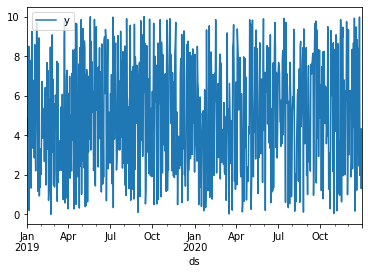

In [5]:
series[1].plot(x = 'ds', y = 'y')

A random time-series

Let’s create a simple Prophet model, for this we define a function that takes a time-series and fits a model with the data, then we can use that model to predict the next 200 days.

## Forecasting using Prophet

In [6]:
from fbprophet import Prophet

In [7]:
def run_prophet(timeserie):
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=200, include_history=False)
    forecast = model.predict(forecast)
    return forecast

In [8]:
x = run_prophet(series[0])

We can see our forecasted results for that serie

In [9]:
x.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-31,4.933319,1.331974,8.685573,4.933319,4.933319,0.060661,0.060661,0.060661,0.060661,0.060661,0.060661,0.0,0.0,0.0,4.993980
1,2021-01-01,4.933244,1.555440,8.705652,4.933244,4.933244,0.265887,0.265887,0.265887,0.265887,0.265887,0.265887,0.0,0.0,0.0,5.199131
2,2021-01-02,4.933169,0.922241,8.452839,4.933169,4.933169,-0.222387,-0.222387,-0.222387,-0.222387,-0.222387,-0.222387,0.0,0.0,0.0,4.710782
3,2021-01-03,4.933094,1.657045,8.800984,4.933094,4.933094,0.248686,0.248686,0.248686,0.248686,0.248686,0.248686,0.0,0.0,0.0,5.181780
4,2021-01-04,4.933018,0.992691,8.503359,4.933018,4.933018,-0.080415,-0.080415,-0.080415,-0.080415,-0.080415,-0.080415,0.0,0.0,0.0,4.852603


## Running 500 time-series:

In [10]:
import time
from tqdm import tqdm

In [11]:
start_time = time.time()
result = list(map(lambda timeserie: run_prophet(timeserie), tqdm(series)))
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 500/500 [20:03<00:00,  2.41s/it]

--- 1203.8109979629517 seconds ---


The code took: `20.8641842` minutes to run

Adding multiprocessing to our code, Here we will launch a process for each time-serie forecast, so we can run our run_prophet function in parallel while we do the map of the list.

In [12]:
from multiprocessing import Pool, cpu_count

In [13]:
start_time2 = time.time()
p = Pool(cpu_count())
predictions = list(tqdm(p.imap(run_prophet, series), total=len(series)))
p.close()
p.join()
print("--- %s seconds ---" % (time.time() - start_time2))

100%|██████████| 500/500 [08:17<00:00,  1.00it/s]

--- 498.17120718955994 seconds ---


With the previous code, we launch N processes depending of how many CPUs our machine has
The code took `8.26260898` minutes to run

### So we got a speedup of `12.60157522`

if we want to run this faster, we could use a machine with more CPUs

## Conclusion
We could see that using multiprocessing is a great way to forecasting multiple time-series faster, in many problems multiprocessing could help to reduce the execution time of our code.